<a href="https://colab.research.google.com/github/RachitBansal/RedditFlairDetector/blob/master/2_EDA%26PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Pre-Processing

In this notebook, we will analyse the data which we collected in the previous step by performing appropriate EDA Techniques and will proprocess the data accordingly. Lastly, the final processed data would be saved as a csv file to be used for modelling. 

.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


.

Reading the pre-final data file which is to be analysed and processed.

In [0]:
df = pd.read_csv('./drive/My Drive/rMIDAS_final.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head(10)

,created_utc,id,link_flair_text,num_comments,selftext,title,url
0,1554185977,b8fe48,NaN,2.0,NaN,Opinion | A theory about the sudden rise of Ni...,https://www.livemint.com/opinion/columns/opini...
1,1515991106,7qhc9y,NaN,0.0,[deleted],PU Colleges in Mangalore.,https://www.reddit.com/r/india/comments/7qhc9y...
2,1558945602,btjiv5,Politics,3.0,NaN,Remembering Jawaharlal Nehru on his death anni...,https://i.redd.it/txph3eq1sp031.jpg
3,1501064512,6pn4gj,Non-Political,0.0,NaN,[FRESH VIDEO] Armaan Malik - 'Barfani' (Babumo...,https://www.youtube.com/watch?v=LzETSqumgCY
4,1517726535,7v59mr,NaN,0.0,NaN,"7,000 super-rich Indians shifted overseas in 2...",http://zeenews.india.com/india/7000-super-rich...
5,1574087019,dy3t9k,Non-Political,2.0,Today I had an appointment for my kid's passpo...,Whims and fancies of officers at PSK [NP],https://www.reddit.com/r/india/comments/dy3t9k...
6,1410478029,2g5gqn,Non-Political,1.0,NaN,Rann Utsav - A festival in the deserts of Kutc...,http://www.rannutsav.net/
7,1483609441,5m5j3f,Science/Technology,3.0,NaN,CCMB signs MoUs with four startups,http://economictimes.indiatimes.com/small-biz/...
8,1479750176,5e5caf,Politics,0.0,[deleted],PM Modi didn't do his homework,http://www.forbes.com/sites/panosmourdoukoutas...
9,1492613889,66aplw,Politics,2.0,NaN,GST rules: One leg still stuck in old taxes,http://www.forbesindia.com/article/special/gst...


In [0]:
df.shape

(749973, 7)

We can see that we have close to .75M rows in our data

.

Analysing the number of Flairs in the entire data as well as the number of Data Points for each of them:

In [0]:
flairs_in_df = list( dict.fromkeys(list(df.loc[:, 'link_flair_text'].values)))
print(len(flairs_in_df))
for flair in flairs_in_df:
  count = np.sum(df.loc[:, 'link_flair_text'].values == flair)
  if(count>500):
    print(flair, "\t", count)

731
Politics 	 129061
Non-Political 	 204007
Science/Technology 	 14010
AskIndia 	 45811
Policy/Economy 	 18642
Coronavirus 	 7004
Entertainment 	 4421
Repost. 	 2307
Sports 	 6217
Stickied Topic. 	 799
Policy 	 2306
[R]eddiquette 	 10424
Business/Finance 	 17436
All CAPS. 	 1700
Not in English. 	 4666
Meta. 	 529
Food 	 3395
Demonetization 	 6457
Scheduled 	 1754
Repost; 	 1284
Science &amp; Technology 	 1810
Business &amp; Finance 	 892
Policy &amp; Economy 	 2012
Low-effort self-post. 	 1231
Not about India. 	 2615
Unverified Content. 	 930
Photography 	 4331
Not Original Title. 	 2117
CAA-NRC 	 1070


## Handling redundant data

From the above cell, it can be seen that there is a presence of some redundant Flairs in the data like 'Science &amp; Technology' <-> 'Science/Technology' and 'Business &amp; Finance' <-> 'Business/Finance'. These can be concatendated as done below:

In [0]:
df['selftext'].replace('[deleted]', 'None', inplace=True)
df['link_flair_text'].replace('Science &amp; Technology', 'Science/Technology', inplace=True)
df['link_flair_text'].replace('Business &amp; Finance', 'Business/Finance', inplace=True)
df['link_flair_text'].replace('CAA-NRC', 'Politics', inplace=True)
df['link_flair_text'].replace('Demonetization', 'Policy/Economy', inplace=True)
df['link_flair_text'].replace('Policy &amp; Economy', 'Policy/Economy', inplace=True)

.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749973 entries, 0 to 749972
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_utc      749970 non-null  object 
 1   id               749956 non-null  object 
 2   link_flair_text  509337 non-null  object 
 3   num_comments     749931 non-null  float64
 4   selftext         208140 non-null  object 
 5   title            696974 non-null  object 
 6   url              696975 non-null  object 
dtypes: float64(1), object(6)
memory usage: 40.1+ MB


## Handling 'NaN's

It can be observed that close to .24M rows have our label (i.e. link_flair_text) as 'NaN' and around 0.05M rows have our main input (i.e. title) as 'NaN'. These rows can't be included in our data and are removed in the step below:

In [0]:
df = df.dropna('index', subset = ['title', 'link_flair_text'])
df['num_comments'] = df['num_comments'].astype(int)
df = df.reset_index()
df = df.drop('index', 'columns')
print(df.shape)

(456357, 7)


In [0]:
flairs_to_keep = []
flairs_in_df = list( dict.fromkeys(list(df.loc[:, 'link_flair_text'].values)))
print(len(flairs_in_df))
for flair in flairs_in_df:
  count = np.sum(df.loc[:, 'link_flair_text'].values == flair)
  if(count>500):
    print(flair, "\t", count)
    flairs_to_keep.append(flair)

700
Politics 	 130123
Non-Political 	 151061
Science/Technology 	 15820
AskIndia 	 45811
Policy/Economy 	 27111
Coronavirus 	 7004
Entertainment 	 4421
Repost. 	 2307
Sports 	 6217
Stickied Topic. 	 799
Policy 	 2306
[R]eddiquette 	 10424
Business/Finance 	 18328
All CAPS. 	 1699
Not in English. 	 4666
Meta. 	 529
Food 	 3395
Scheduled 	 1754
Repost; 	 1284
Low-effort self-post. 	 1231
Not about India. 	 2615
Unverified Content. 	 930
Photography 	 4331
Not Original Title. 	 2117


After performing the preprocessing steps so far, we are left with .45M rows and 700 Flairs in the data.

.

Out of these 700, only those Flairs are to be kept in the final data which have at lest 500 values and that is done by removing the others:

In [0]:
for i in range(df.shape[0]):
  if(i%10000 == 0):
    print(i)
  if(df.loc[i, 'link_flair_text'] not in flairs_to_keep):
    df = df.drop(i, 'index')
    continue

290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000


In [0]:
df.reset_index(inplace=True)
df.drop('index', 'columns', inplace = True)
print(df.shape)

(446283, 7)


In [0]:
df.head()

,created_utc,id,link_flair_text,num_comments,selftext,title,url
0,1558945602,btjiv5,Politics,3,NaN,Remembering Jawaharlal Nehru on his death anni...,https://i.redd.it/txph3eq1sp031.jpg
1,1501064512,6pn4gj,Non-Political,0,NaN,[FRESH VIDEO] Armaan Malik - 'Barfani' (Babumo...,https://www.youtube.com/watch?v=LzETSqumgCY
2,1574087019,dy3t9k,Non-Political,2,Today I had an appointment for my kid's passpo...,Whims and fancies of officers at PSK [NP],https://www.reddit.com/r/india/comments/dy3t9k...
3,1410478029,2g5gqn,Non-Political,1,NaN,Rann Utsav - A festival in the deserts of Kutc...,http://www.rannutsav.net/
4,1483609441,5m5j3f,Science/Technology,3,NaN,CCMB signs MoUs with four startups,http://economictimes.indiatimes.com/small-biz/...


.

The figure belolw shows the 'NaN' Values in the entire data in the form of a heatmap, it can be observed that only the 'selftext' column (which represents the description of a reddit post) has NaN values. These are replaced by a placeholder 'None'.

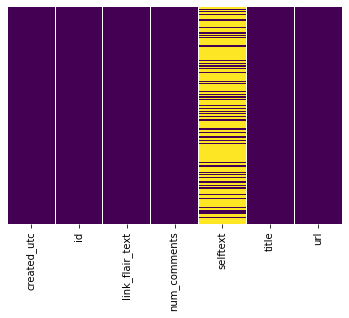

In [0]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [0]:
df.fillna('None', inplace = True)

The figure below shows the amount of data available corresponding to each Flair

In [0]:
flairs_count = {
    'flair': [],
    'count': []
}

for flair in flairs_to_keep:
  count = np.sum(df.loc[:, 'link_flair_text'].values == flair)
  flairs_count['flair'].append(flair)
  flairs_count['count'].append(count)

pd.DataFrame(flairs_count) \
    .round(decimals=2) \
    .sort_values('count', ascending=False) \
    .style.bar(color=['grey', 'red'], align='zero')

,flair,count
1,Non-Political,151061
0,Politics,130123
3,AskIndia,45811
4,Policy/Economy,27111
12,Business/Finance,18328
2,Science/Technology,15820
11,[R]eddiquette,10424
5,Coronavirus,7004
8,Sports,6217
14,Not in English.,4666


## Balancing out the dataset

As can be seen from the above figure, the data is highly unbalanced across the classes, thus data balancing is carried out by resampling and downsampling from this data. The most data-rich classes 'Politics' and 'Non-Politics' have been reduced to a comparable size as the other classes.

In [0]:
politics_df = df.loc[df['link_flair_text'] == 'Politics']
non_pol_df = df.loc[df['link_flair_text'] == 'Non-Political']

In [0]:
n_p_df = df.loc[df['link_flair_text'] != 'Politics']
n_p_df = n_p_df.loc[n_p_df['link_flair_text'] != 'Non-Political']

In [0]:
print(politics_df.shape, non_pol_df.shape, n_p_df.shape)

(130123, 7) (151061, 7) (165099, 7)


In [0]:
from sklearn.utils import resample

pol_downs = resample(politics_df,
                          replace = False, # sample without replacement
                          n_samples = 75000, # match minority n
                          random_state = 27)

non_pol_downs = resample(non_pol_df,
                          replace = False, # sample without replacement
                          n_samples = 75000, # match minority n
                          random_state = 27)

In [0]:
print(pol_downs.shape, non_pol_downs.shape)

(75000, 7) (75000, 7)


In [0]:
df_bal = pd.concat([pol_downs, non_pol_downs, n_p_df])

In [0]:
df_bal.shape

(315099, 7)

In [0]:
flairs_to_keep = list(set(df['link_flair_text']))

In [0]:
flairs_count = {
    'flair': [],
    'count': []
}

for flair in flairs_to_keep:
  count = np.sum(df_bal.loc[:, 'link_flair_text'].values == flair)
  flairs_count['flair'].append(flair)
  flairs_count['count'].append(count)

pd.DataFrame(flairs_count) \
    .round(decimals=2) \
    .sort_values('count', ascending=False) \
    .style.bar(color=['grey', 'red'], align='zero')

,flair,count
2,Politics,75000
19,Non-Political,75000
11,AskIndia,45811
16,Policy/Economy,27111
12,Business/Finance,18328
20,Science/Technology,15820
3,[R]eddiquette,10424
21,Coronavirus,7004
10,Sports,6217
18,Not in English.,4666


In [0]:
df_to_keep = []
for flair in flairs_to_keep:
  df_ = df_bal.loc[df['link_flair_text'] == flair]
  if(df_.shape[0] > 4000):
    df_to_keep.append(df_)

In [0]:
df_bal_2 = pd.concat(df_to_keep)

In [0]:
flairs_count = {
    'flair': [],
    'count': []
}

for flair in list(set(df_bal_2['link_flair_text'])):
  count = np.sum(df_bal_2.loc[:, 'link_flair_text'].values == flair)
  flairs_count['flair'].append(flair)
  flairs_count['count'].append(count)

pd.DataFrame(flairs_count) \
    .round(decimals=2) \
    .sort_values('count', ascending=False) \
    .style.bar(color=['grey', 'red'], align='zero')

,flair,count
4,Politics,75000
5,Non-Political,75000
7,AskIndia,45811
1,Policy/Economy,27111
8,Business/Finance,18328
9,Science/Technology,15820
11,[R]eddiquette,10424
10,Coronavirus,7004
6,Sports,6217
2,Not in English.,4666


In [0]:
df_bal_2 = df_bal_2.sample(frac=1).reset_index(drop=True)
df_bal_2.head(20)

,created_utc,id,link_flair_text,num_comments,selftext,title,url
0,1.518180e+09,7wd78f,Politics,0,None,Nehru Thug Life,i redd it 6tiqhn3co6f01 png
1,1.552281e+09,azpdkm,Science/Technology,0,None,Ten questions that cannot be answered by science,www eternalhindutva com 2019 03 Ten-questions-...
2,1.545422e+09,a8dqbe,AskIndia,0,None,Waah modiji waah,www youtube com channel UCfM1o8q1hiCgkBpjmLCmJ9g
3,1.417681e+09,2o8spg,Non-Political,2,None,Sailing to Agra on Yamuna to be reality soon: ...,zeenews india com news india sailing-to-agra-o...
4,1.424275e+09,2wbliw,[R]eddiquette,1,How serious the outburst is ? What are initial...,Advice and preventive measures for swine flu,www reddit com r india comments 2wbliw advice_...
5,1.545826e+09,a9o0n5,Business/Finance,0,None,Slag Crusher Plant Manufacturer Exporters in I...,slagcrusher co in india slag-crusher-plant-man...
6,1.551449e+09,aw55oe,[R]eddiquette,45,None,"Four security personnel, including an officer,...",www ndtv com india-news kupwara-4-security-per...
7,1.584577e+09,fl0c32,AskIndia,6,Hi. I’m looking for best cat wet food you get ...,Which is the best cat wet food available in in...,www reddit com r india comments fl0c32 which_i...
8,1.483704e+09,5md788,Non-Political,2,None,Kashmir University defers all exams scheduled ...,indiatoday intoday in story kashmir-university...
9,1.499679e+09,6mddyx,Non-Political,0,None,"Egg mask, honey: Get rid of split ends by mean...",buyhatke com blog ?p=3185


.

Finally, after preprocessing, we are left with **446283 (.446M) Data Points** across **23 Classes (Flairs)** in the Unbalanced Data
While, **315099 (.315M) Data Points** across **12 Classes (Flairs)** in the Balanced Data.

.

## Further Exploration of the Data

The discussion from here on involves numerical EDA of the data by the following ways:

- Studying the relation and correlation between [Number of Comments, Length of {Title, Self Text and URL}] wrt the Label (Flair) in the data. 

- Plotting the Correlation Matrix of the above quantities in various ways.

In [0]:
!pip install pytorch-nlp

     |████████████████████████████████| 92kB 2.4MB/s 


In [0]:
import torchnlp
from torchnlp.encoders import LabelEncoder

.

Creating a corresponding dataset containing the numerical data as was explained above

- LabelEncoding the flairs
- {Title, Selftext, URL} --> Length of each

In [0]:
df_cols = {'link_flair_text':[], 'num_comments':[], 'selftext':[], 'title':[], 'url':[]}

In [0]:
for i in range(df.shape[0]):
  df_cols['link_flair_text'].append(df.loc[i, 'link_flair_text'])
  df_cols['title'].append(len(df.loc[i, 'title']))
  df_cols['url'].append(len(df.loc[i, 'url']))
  df_cols['num_comments'].append(int(df.loc[i, 'num_comments']))
  if type(df.loc[i, 'selftext']) != float:
    df_cols['selftext'].append(len(df.loc[i, 'selftext']))
  else:
    df_cols['selftext'].append(0)

In [0]:
encoder = LabelEncoder(df_cols['link_flair_text'])

In [0]:
df_cols['link_flair_text'] = encoder.batch_encode(df_cols['link_flair_text'])

In [0]:
df_supp = pd.DataFrame(df_cols)
df_supp.head(10)

,link_flair_text,num_comments,selftext,title,url
0,1,3,0,53,35
1,2,0,0,96,43
2,2,2,1019,41,87
3,2,1,0,57,25
4,3,3,0,34,114
5,1,0,4,30,103
6,1,2,0,43,93
7,1,1,1623,71,92
8,1,0,0,52,33
9,1,0,0,110,62


In [0]:
df_supp.describe()

,link_flair_text,num_comments,selftext,title,url
count,446308.000000,446308.000000,446308.000000,446308.000000,446308.000000
mean,4.053244,11.064081,106.766800,70.069161,90.535142
std,4.773658,52.201172,516.591479,40.943143,41.302197
min,1.000000,-3.000000,0.000000,1.000000,4.000000
25%,1.000000,0.000000,4.000000,46.000000,60.000000
50%,2.000000,1.000000,4.000000,64.000000,93.000000
75%,4.000000,7.000000,4.000000,83.000000,115.000000
max,24.000000,11706.000000,39826.000000,318.000000,2107.000000


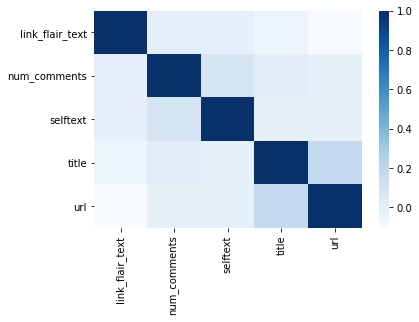

In [0]:
plt.figure(figsize=(6,4))
sns.heatmap(df_supp.corr(),cmap='Blues',annot=False) 

In the above figure, dark shades represents positive correlation while lighter shades represents negative correlation. 

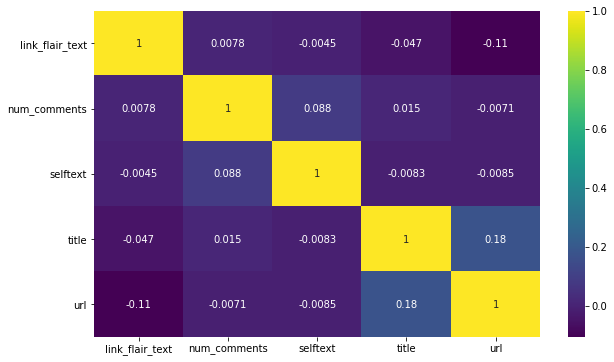

In [0]:
k = 5 #number of variables for heatmap
cols = df_supp.corr().nlargest(k, 'link_flair_text')['link_flair_text'].index
cm = df_supp[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

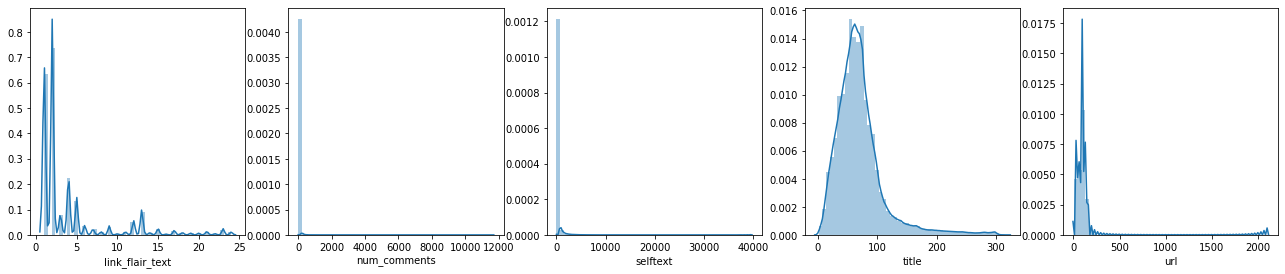

In [0]:
l = df_supp.columns.values
n_cols = 5
n_rows = len(l)-1/n_cols
plt.figure(figsize=(2*n_cols+15,5*n_rows))
for i in range(0,len(l)):
    plt.subplot(n_rows+1, n_cols, i+1)
    sns.distplot(df_supp[l[i]],kde=True)

The above figure shows that the 'Title' length spans across a considerable range and can be approximated via a Gaussian Distribution with mean at 100, i.e., most of the Title Lengths have a length around 100. 

.

## Exporting the final preprocessed data; to be used in the next steps

In [0]:
df.to_csv('./drive/My Drive/rMIDAS.csv', index = False)

In [0]:
df = pd.read_csv('./drive/My Drive/rMIDAS.csv')
print(df.shape)
df.head(10)

(446283, 7)


,created_utc,id,link_flair_text,num_comments,selftext,title,url
0,1.558946e+09,btjiv5,Politics,3,None,Remembering Jawaharlal Nehru on his death anni...,https://i.redd.it/txph3eq1sp031.jpg
1,1.501065e+09,6pn4gj,Non-Political,0,None,[FRESH VIDEO] Armaan Malik - 'Barfani' (Babumo...,https://www.youtube.com/watch?v=LzETSqumgCY
2,1.574087e+09,dy3t9k,Non-Political,2,Today I had an appointment for my kid's passpo...,Whims and fancies of officers at PSK [NP],https://www.reddit.com/r/india/comments/dy3t9k...
3,1.410478e+09,2g5gqn,Non-Political,1,None,Rann Utsav - A festival in the deserts of Kutc...,http://www.rannutsav.net/
4,1.483609e+09,5m5j3f,Science/Technology,3,None,CCMB signs MoUs with four startups,http://economictimes.indiatimes.com/small-biz/...
5,1.479750e+09,5e5caf,Politics,0,None,PM Modi didn't do his homework,http://www.forbes.com/sites/panosmourdoukoutas...
6,1.492614e+09,66aplw,Politics,2,None,GST rules: One leg still stuck in old taxes,http://www.forbesindia.com/article/special/gst...
7,1.582680e+09,f9l1cs,Politics,1,"You will become neither Hindu nor Muslim, \n ...","Translation from Old Song: You, the child of a...",https://www.reddit.com/r/india/comments/f9l1cs...
8,1.559199e+09,bupx95,Politics,0,None,Indian establishment responsible for Pulwama a...,https://imgur.com/gallery/WKP0iMZ
9,1.576755e+09,ecrwjc,Politics,0,None,"Prime minister cannot find his degree, but the...",https://twitter.com/ankitchiplunkar/status/120...


In [0]:
df_bal_2.to_csv('./drive/My Drive/rMIDAS_bal_2.csv', index = False)